In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp # 1 sample t test
from scipy.stats import ttest_ind # Takes data as input and returns stat and p
from scipy.stats import ttest_ind_from_stats # Takes sample means, std, n and returns stat and p

### Problem Solving Hints
We have code to do the following:
 1. ttest one sample.
 2. ttest two sample from data.
 3. ttest two sample from descriptive stats.

In [ ]:
## From the scratch implementation of ttest_ind
# EQUIVALENT FUNCTION: scipy.stats.ttest_ind
from scipy.stats import t

def ttest_ind_from_data(d1, d2, alternative="two-sided"):
    """
    d1: pandas Series
    d2: pandas Series
    alternative: {‘two-sided’, ‘less’, ‘greater’}, optional
    """
    n1 = len(d1)
    n2 = len(d2)
    
    m1 = d1.mean()
    m2 = d2.mean()
    
    s1 = d1.std()
    s2 = d2.std()
    
    df = n1 + n2 - 2
    
    s = np.sqrt((((n1-1)*(s1**2)) + ((n2-1)*(s2**2))) / (n1 + n2 - 2))
    
    t_stat = (m1 - m2) / (s*np.sqrt(1/n1+ 1/n2))
    
    if alternative == "two-sided":
        p_value = 2*(1 - t.cdf(t_stat, df=df))
    if alternative == "less":
        p_value = t.cdf(t_stat, df=df)
    if alternative == "greater":
        p_value = 1 - t.cdf(t_stat, df=df)
    print("T-stat = ", t_stat)
    print("P-value = ", p_value)

In [ ]:
# EQUIVALENT FUNCTION: scipy.stats.ttest_ind_from_stats
def ttest_ind_from_mean_and_std_dev(m1, s1, n1, m2, s2, n2, alternative="two-sided"):
    """
    m1, m2: mean of first and second set of samples respectively
    n1, n2: number of samples in first and second set respectively
    s1, s2: sample standard deviations of first and second set respectively
    alternative: {‘two-sided’, ‘less’, ‘greater’}, optional
    """
    df = n1 + n2 - 2
    
    s = np.sqrt((((n1-1)*(s1**2)) + ((n2-1)*(s2**2))) / (n1 + n2 - 2))
    
    t_stat = (m1 - m2) / (s*np.sqrt(1/n1+ 1/n2))
    
    if alternative == "two-sided":
        p_value = 2*(1 - t.cdf(t_stat, df=df))
    if alternative == "less":
        p_value = t.cdf(t_stat, df=df)
    if alternative == "greater":
        p_value = 1 - t.cdf(t_stat, df=df)
    print("T-stat = ", t_stat)
    print("P-value = ", p_value)

## Coin example - Chi-square test

In [ ]:
from scipy.stats import chi2

stat = 0.72
print("p-value: ", 1 - chi2.cdf(stat, df=1))

p-value:  0.3961439091520741


In [ ]:
## Assume a stat significance of alpha = 95%
print(chi2.ppf(0.95, df = 1))

3.841458820694124


In [ ]:
from scipy.stats import chisquare

chi_stat, p_value = chisquare([28, 22], [25, 25])
print(chi_stat)
print(p_value)

0.72
0.3961439091520741


In [ ]:
from scipy.stats import chisquare

chi_stat, p_value = chisquare([45, 5], [25, 25])
print(chi_stat)
print(p_value)

32.0
1.5417257900280013e-08


### Dice example

In [ ]:
## p-value of the dice example
alpha = 0.1
p_value = 1 - chi2.cdf(9.67, df = 5)
if p_value < alpha:
    print("Reject the null hypothesis, dice is biased")
else:
    print("Fail to reject the null hypothesis, dice is fair")

Reject the null hypothesis, dice is biased


In [ ]:
crit_val = chi2.ppf(0.9, df=5)

chi_stat, p_value = chisquare([2, 4, 8, 9, 3, 10], [6]*6)
print("Chi2 stat:", chi_stat)
print("Critical value:", chi_stat)
print("p-value: ", p_value)

if chi_stat > crit_val:
    print("Reject the null hypothesis, dice is biased")
else:
    print("Fail to reject the null hypothesis, dice is fair")

Chi2 stat: 9.666666666666666
Critical value: 9.666666666666666
p-value:  0.08525020077588863
Reject the null hypothesis, dice is biased


### Gender vs. Buying preference

In [ ]:
from scipy.stats import chi2_contingency

observed = [527, 72, 206, 102]
expected = [484, 115, 249, 59]

chi_stat, p_value = chisquare(observed, expected)
print(chi_stat)
print(p_value)

58.66319466554195
1.1344741517267437e-12


In [ ]:
from scipy.stats import chi2_contingency

observed = [
    [527, 72],
    [206, 102]
]

chi_stat, p_value, df, exp_freq = chi2_contingency(observed)
print(chi_stat, p_value)

57.04098674049609 4.268230756875865e-14


### Aerofit Dataset

In [ ]:
df_aerofit = pd.read_csv("aerofit.csv")

In [ ]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## Income vs. Product
If we know the income, can we predice which product is bought?

<AxesSubplot:xlabel='Product', ylabel='Income'>

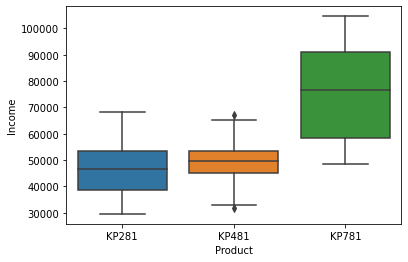

In [ ]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

### Step 1: Convert the continuous variable income to a categorical variable

In [ ]:
bins = [0, df_aerofit["Income"].median(), df_aerofit["Income"].max()]
labels = ["low", "high"]
df_aerofit["Income_bin"] = pd.cut(df_aerofit["Income"], bins, labels=labels)

In [ ]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_bin
0,KP281,18,Male,14,Single,3,4,29562,112,low
1,KP281,19,Male,15,Single,2,3,31836,75,low
2,KP281,19,Female,14,Partnered,4,3,30699,66,low
3,KP281,19,Male,12,Single,3,3,32973,85,low
4,KP281,20,Male,13,Partnered,4,2,35247,47,low


### Step 2: Define the contingency table

In [ ]:
income_bin_product = pd.crosstab(index=df_aerofit["Income_bin"], columns=df_aerofit["Product"])
income_bin_product

Product,KP281,KP481,KP781
Income_bin,,,
low,50,35,5
high,30,25,35


In [ ]:
# H0: income bin and product are independent
# Ha: dependant
chi2_contingency(income_bin_product) # chistat, p-value, df, expected

(29.166666666666668,
 4.640222499769401e-07,
 2,
 array([[40., 30., 20.],
        [40., 30., 20.]]))

## Gender vs. Income

In [ ]:
gender_income_product = pd.crosstab(index=df_aerofit["Gender"], columns=df_aerofit["Income_bin"])
gender_income_product

Income_bin,low,high
Gender,,
Female,46,30
Male,44,60


In [ ]:
# H0: gender and income are independent
# Ha: dependant
chi2_contingency(gender_income_product) # chistat, p-value, df, expected

(5.123987854251012,
 0.023597328751612016,
 1,
 array([[38., 38.],
        [52., 52.]]))

In [ ]:
## With an alpha of 0.05, we conclude that income and gender are dependent

#### Assumptions of Chi2 test
* Variables are categorical
* Observations are independent
* Each cell is mutually exclusive
* Expected value in each cell is greater than 5 (at least in 80% of cells)

### Doubt session question 1

The average hourly wage of a sample of 150 workers in plant 'A' was Rs.2·87 with a standard deviation of Rs. 1·08.

The average wage of a sample of 200 workers in plant 'B' was Rs. 2·56 with a standard deviation of Rs. 1·28.

Can an applicant safely assume that the hourly wages paid by plant 'A' are higher than those paid by plant 'B' at a 1% significance level?

In [ ]:
## 1-sample or 2? 2 sample test -> ttest_ind
## data or stats? stats -> ttest_ind_from_stats
## Left tailed or right tailed? -> right tailed, I want to show that A is greater than B
## Significance level -> 1%, so alpha = 0.01

mean_1 = 2.87
std_dev_1 = 1.08
n1 = 150

mean_2 = 2.56
std_dev_2 = 1.28
n2 = 200

alpha = 0.01

t_stat, p_value = ttest_ind_from_stats(mean_1, std_dev_1, n1, mean_2, std_dev_2, n2, alternative="greater")
print(t_stat, p_value)

if p_value < alpha:
    print("Reject the null hypothesis, the two means are different")
else:
    print("Accept the null hypothesis, the two means are the same")

2.3947738234213953 0.008579470194694674
Reject the null hypothesis, the two means are different


In [ ]:
ttest_ind_from_mean_and_std_dev(mean_1, std_dev_1, n1, mean_2, std_dev_2, n2, alternative="greater")

T-stat =  2.3947738234213953
P-value =  0.008579470194694738


### How to calculate the p-value for a 2-tailed test?
I am going to show how using the t-distribution, for the above question.

In [ ]:
## 1-sample or 2? 2 sample test -> ttest_ind
## data or stats? stats -> ttest_ind_from_stats
## Left tailed or right tailed? -> right tailed, I want to show that A is greater than B
## Significance level -> 1%, so alpha = 0.01

mean_1 = 2.87
std_dev_1 = 1.08
n1 = 150

mean_2 = 2.56
std_dev_2 = 1.28
n2 = 200

alpha = 0.01

t_stat, p_value = ttest_ind_from_stats(mean_1, std_dev_1, n1, mean_2, std_dev_2, n2)
print(t_stat, p_value)

if p_value < alpha:
    print("Reject the null hypothesis, the two means are different")
else:
    print("Accept the null hypothesis, the two means are the same")

2.3947738234213953 0.017158940389389348
Accept the null hypothesis, the two means are the same


In [ ]:
m1 = 2.87
s1 = 1.08
n1 = 150

m2 = 2.56
s2 = 1.28
n2 = 200

df = n1 + n2 - 2
    
s = np.sqrt((((n1-1)*(s1**2)) + ((n2-1)*(s2**2))) / (n1 + n2 - 2))

t_stat = (m1 - m2) / (s*np.sqrt(1/n1+ 1/n2))

In [ ]:
neg = -1 * np.abs(t_stat)
pos =  1 * np.abs(t_stat)

dof = n1 + n2 - 2

p_value_neg = t.cdf(neg, df=dof)
p_value_pos = 1 - t.cdf(pos, df=dof)

p_value = p_value_pos + p_value_neg

print(p_value_neg, p_value_pos, p_value) # Should be 0.017158940389389348

0.008579470194694674 0.008579470194694738 0.017158940389389414


### Q2) Smokers
When smokers smoke, nicotine is transformed into cotinine, which can be tested.

The average cotinine level in a group of 50 smokers was 243.5 ng ml.

Assuming that the standard deviation is known to be 229.5 ng ml, at 95 % confidence, test the assertion that the mean cotinine level of all smokers is equal to 300.0 ng ml.

In [ ]:
m1 = 300
s1 = 229.5
n1 = 50

m2 = 243.5
s2 = 229.5
n2 = 1000000

df = n1 + n2 - 2
    
s = np.sqrt((((n1-1)*(s1**2)) + ((n2-1)*(s2**2))) / (n1 + n2 - 2))

t_stat = (m1 - m2) / (s*np.sqrt(1/n1+ 1/n2))
print(t_stat)

1.740764025540937


In [ ]:
t.ppf(0.975, df=n1 - 1)

2.009575234489209

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, ttest_1samp
from statsmodels.stats.weightstats import ztest

In [ ]:
df = pd.read_csv("Sachin_ODI.csv")

mu = df["runs"].mean()
sigma = df["runs"].std()

print("Mean: ", mu, " Std: ", sigma)

Mean:  43.24166666666667  Std:  42.18245206052442


### India Winning the match - Does Sachin score higher if India wins?

H0: Sachin's mean score when india wins is similar to his overall performance.

H1: Sachin scores higher when India wins.

In [ ]:
df.groupby(["Won"])["runs"].mean()

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

In [ ]:
all_victory_runs = df[df["Won"]==True][["runs"]]
data = all_victory_runs

z = (data.mean() - mu) / (sigma / np.sqrt(len(data)))
p = 1 - norm.cdf(z)

print("n: ", len(data))
print("p-value: ", p)

if p < 0.05:
    print("Reject H0")
else:
    print("Stick to your null hypothesis")
    print("No difference between first innings and overall mean")

n:  184
p-value:  [0.00630041]
Reject H0


### What to do if population standard deviation is not known?
Practically speaking, it is nearly impossible to calculate the population standard deviation exactly. Hence, we have to switch from the z-test to the t-test. However, if "n" is large, then t and z test will give us the same results.

In [ ]:
all_victory_runs = df[df["Won"]==True][["runs"]]
data = all_victory_runs

In [ ]:
ztest(data, value=mu, alternative="larger") # Right tailed test: z_stat, p_value

(array([2.35695059]), array([0.00921285]))

In [ ]:
ttest_1samp(data, popmean=mu, alternative="greater") # t-stat, pvalue

Ttest_1sampResult(statistic=array([2.35695059]), pvalue=array([0.00974129]))

Let x1 and x2 denote the hourly wages (in Rs.)of workers in plant ‘A’ and plant ‘B’ respectively.
* Given:
* n1 = 150, x1 = 2·87, s1 = 1·08
* n2 = 150, x2 = 2·56, s2 = 1·28

* H0: μ1 ≤ μ2, i.e., the hourly wages paid by plant ‘A’ are less than or equal to those paid by plant ‘B’.
* H1: μ1 > μ2,(Right one-tailed test) i.e., the hourly wages paid by plant ‘A’ are higher than those paid by plant ‘B’.



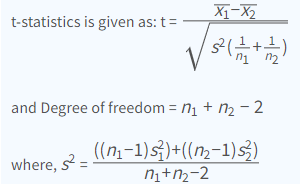

In [ ]:
#Code approach 1:
from scipy.stats import ttest_ind_from_stats
t_stat, p_value = ttest_ind_from_stats(2.87, 1.08, 150, 2.56, 1.28, 200, alternative="greater")
print("Test statistic = ", round(t_stat, 2))
print("P-value", round(p_value, 4))
if p_value < 0.01:
  print("Reject H0")
else:
  print("Fail to reject H0")

Test statistic =  2.39
P-value 0.0086
Reject H0


In [ ]:
# Code approach 2:
from scipy import stats
from scipy.stats import t
import numpy as np
n1=150
samp_avg1 = 2.87
samp_std1 = 1.08
n2=200
samp_avg2 = 2.56
samp_std2 = 1.28
df=n1 + n2 - 2
print('Degrees of freedom:', df)
s = np.sqrt((((n1-1)*(samp_std1**2)) + ((n2-1)*(samp_std2**2))) / (n1 + n2 - 2))
t_stat = (samp_avg1 - samp_avg2) / (s*np.sqrt(1/n1+ 1/n2))
print('Test Statistic:',round(abs( t_stat),2))
t_val = t.ppf(0.99, df=min(n1 - 1, n2 - 1))
print('Critical value for t-test:', round(t_val, 2))
if t_stat < t_val :
 print('t stat < t critical so, fail to reject the null hypothesis ')
else:
 print('t stat > t critical reject the null hypothesis ')


Degrees of freedom: 348
Test Statistic: 2.39
Critical value for t-test: 2.35
t stat > t critical reject the null hypothesis 


In case of two tail test, find t-crtitcal value with 95% confidence:
* critical_value = round(t.ppf(0.05/2, df=49), 4)

* H0: μ1 ≤ μ2, i.e., the average score of females is not greater than the average score of males.
* H1: μ1 > μ2 (Right-tailed test), the average score of females is greater than the average score of males.


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, kstest
female_scores=pd.Series([25,30,45,49,47,35,32,42])
male_scores=pd.Series([45,47,25,22,29,32,27,28,40,49,50,33])

t_stat, p_value = ttest_ind(female_scores, male_scores, alternative="two-sided")
print("Test statistic = ", round(t_stat,3))
if p_value < 0.05:
 print("Reject H0")
else: 
 print("Fail to reject H0")

Test statistic =  0.58
Fail to reject H0


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, ttest_1samp
from statsmodels.stats.weightstats import ztest

In [ ]:
df = pd.read_csv("Sachin_ODI.csv")

mu = df["runs"].mean()
sigma = df["runs"].std()

print("Mean: ", mu, " Std: ", sigma)

Mean:  43.24166666666667  Std:  42.18245206052442


### India Winning the match - Does Sachin score higher if India wins?

H0: Sachin's mean score when india wins is similar to his overall performance.

H1: Sachin scores higher when India wins.

In [ ]:
df.groupby(["Won"])["runs"].mean()

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

In [ ]:
all_victory_runs = df[df["Won"]==True][["runs"]]
data = all_victory_runs

z = (data.mean() - mu) / (sigma / np.sqrt(len(data)))
p = 1 - norm.cdf(z)

print("n: ", len(data))
print("p-value: ", p)

if p < 0.05:
    print("Reject H0")
else:
    print("Stick to your null hypothesis")
    print("No difference between first innings and overall mean")

n:  184
p-value:  [0.00630041]
Reject H0


### What to do if population standard deviation is not known?
Practically speaking, it is nearly impossible to calculate the population standard deviation exactly. Hence, we have to switch from the z-test to the t-test. However, if "n" is large, then t and z test will give us the same results.

In [ ]:
all_victory_runs = df[df["Won"]==True][["runs"]]
data = all_victory_runs

In [ ]:
ztest(data, value=mu, alternative="larger") # Right tailed test: z_stat, p_value

(array([2.35695059]), array([0.00921285]))

In [ ]:
ttest_1samp(data, popmean=mu, alternative="greater") # t-stat, pvalue

Ttest_1sampResult(statistic=array([2.35695059]), pvalue=array([0.00974129]))

Let x1 and x2 denote the hourly wages (in Rs.)of workers in plant ‘A’ and plant ‘B’ respectively.
* Given:
* n1 = 150, x1 = 2·87, s1 = 1·08
* n2 = 150, x2 = 2·56, s2 = 1·28

* H0: μ1 ≤ μ2, i.e., the hourly wages paid by plant ‘A’ are less than or equal to those paid by plant ‘B’.
* H1: μ1 > μ2,(Right one-tailed test) i.e., the hourly wages paid by plant ‘A’ are higher than those paid by plant ‘B’.



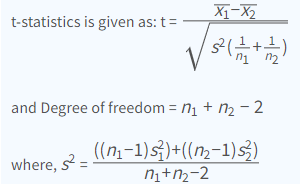

In [ ]:
#Code approach 1:
from scipy.stats import ttest_ind_from_stats
t_stat, p_value = ttest_ind_from_stats(2.87, 1.08, 150, 2.56, 1.28, 200, alternative="greater")
print("Test statistic = ", round(t_stat, 2))
print("P-value", round(p_value, 4))
if p_value < 0.01:
  print("Reject H0")
else:
  print("Fail to reject H0")

Test statistic =  2.39
P-value 0.0086
Reject H0


In [ ]:
# Code approach 2:
from scipy import stats
from scipy.stats import t
import numpy as np
n1=150
samp_avg1 = 2.87
samp_std1 = 1.08
n2=200
samp_avg2 = 2.56
samp_std2 = 1.28
df=n1 + n2 - 2
print('Degrees of freedom:', df)
s = np.sqrt((((n1-1)*(samp_std1**2)) + ((n2-1)*(samp_std2**2))) / (n1 + n2 - 2))
t_stat = (samp_avg1 - samp_avg2) / (s*np.sqrt(1/n1+ 1/n2))
print('Test Statistic:',round(abs( t_stat),2))
t_val = t.ppf(0.99, df=min(n1 - 1, n2 - 1))
print('Critical value for t-test:', round(t_val, 2))
if t_stat < t_val :
 print('t stat < t critical so, fail to reject the null hypothesis ')
else:
 print('t stat > t critical reject the null hypothesis ')


Degrees of freedom: 348
Test Statistic: 2.39
Critical value for t-test: 2.35
t stat > t critical reject the null hypothesis 


In case of two tail test, find t-crtitcal value with 95% confidence:
* critical_value = round(t.ppf(0.05/2, df=49), 4)

* H0: μ1 ≤ μ2, i.e., the average score of females is not greater than the average score of males.
* H1: μ1 > μ2 (Right-tailed test), the average score of females is greater than the average score of males.


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, kstest
female_scores=pd.Series([25,30,45,49,47,35,32,42])
male_scores=pd.Series([45,47,25,22,29,32,27,28,40,49,50,33])

t_stat, p_value = ttest_ind(female_scores, male_scores, alternative="two-sided")
print("Test statistic = ", round(t_stat,3))
if p_value < 0.05:
 print("Reject H0")
else: 
 print("Fail to reject H0")

Test statistic =  0.58
Fail to reject H0


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, ttest_1samp
from statsmodels.stats.weightstats import ztest

In [ ]:
df = pd.read_csv("Sachin_ODI.csv")

mu = df["runs"].mean()
sigma = df["runs"].std()

print("Mean: ", mu, " Std: ", sigma)

Mean:  43.24166666666667  Std:  42.18245206052442


### India Winning the match - Does Sachin score higher if India wins?

H0: Sachin's mean score when india wins is similar to his overall performance.

H1: Sachin scores higher when India wins.

In [ ]:
df.groupby(["Won"])["runs"].mean()

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

In [ ]:
all_victory_runs = df[df["Won"]==True][["runs"]]
data = all_victory_runs

z = (data.mean() - mu) / (sigma / np.sqrt(len(data)))
p = 1 - norm.cdf(z)

print("n: ", len(data))
print("p-value: ", p)

if p < 0.05:
    print("Reject H0")
else:
    print("Stick to your null hypothesis")
    print("No difference between first innings and overall mean")

n:  184
p-value:  [0.00630041]
Reject H0


### What to do if population standard deviation is not known?
Practically speaking, it is nearly impossible to calculate the population standard deviation exactly. Hence, we have to switch from the z-test to the t-test. However, if "n" is large, then t and z test will give us the same results.

In [ ]:
all_victory_runs = df[df["Won"]==True][["runs"]]
data = all_victory_runs

In [ ]:
ztest(data, value=mu, alternative="larger") # Right tailed test: z_stat, p_value

(array([2.35695059]), array([0.00921285]))

In [ ]:
ttest_1samp(data, popmean=mu, alternative="greater") # t-stat, pvalue

Ttest_1sampResult(statistic=array([2.35695059]), pvalue=array([0.00974129]))

Let x1 and x2 denote the hourly wages (in Rs.)of workers in plant ‘A’ and plant ‘B’ respectively.
* Given:
* n1 = 150, x1 = 2·87, s1 = 1·08
* n2 = 150, x2 = 2·56, s2 = 1·28

* H0: μ1 ≤ μ2, i.e., the hourly wages paid by plant ‘A’ are less than or equal to those paid by plant ‘B’.
* H1: μ1 > μ2,(Right one-tailed test) i.e., the hourly wages paid by plant ‘A’ are higher than those paid by plant ‘B’.



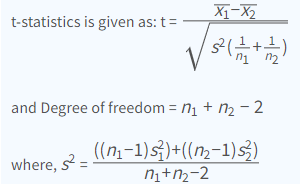

In [ ]:
#Code approach 1:
from scipy.stats import ttest_ind_from_stats
t_stat, p_value = ttest_ind_from_stats(2.87, 1.08, 150, 2.56, 1.28, 200, alternative="greater")
print("Test statistic = ", round(t_stat, 2))
print("P-value", round(p_value, 4))
if p_value < 0.01:
  print("Reject H0")
else:
  print("Fail to reject H0")

Test statistic =  2.39
P-value 0.0086
Reject H0


In [ ]:
# Code approach 2:
from scipy import stats
from scipy.stats import t
import numpy as np
n1=150
samp_avg1 = 2.87
samp_std1 = 1.08
n2=200
samp_avg2 = 2.56
samp_std2 = 1.28
df=n1 + n2 - 2
print('Degrees of freedom:', df)
s = np.sqrt((((n1-1)*(samp_std1**2)) + ((n2-1)*(samp_std2**2))) / (n1 + n2 - 2))
t_stat = (samp_avg1 - samp_avg2) / (s*np.sqrt(1/n1+ 1/n2))
print('Test Statistic:',round(abs( t_stat),2))
t_val = t.ppf(0.99, df=min(n1 - 1, n2 - 1))
print('Critical value for t-test:', round(t_val, 2))
if t_stat < t_val :
 print('t stat < t critical so, fail to reject the null hypothesis ')
else:
 print('t stat > t critical reject the null hypothesis ')


Degrees of freedom: 348
Test Statistic: 2.39
Critical value for t-test: 2.35
t stat > t critical reject the null hypothesis 


In case of two tail test, find t-crtitcal value with 95% confidence:
* critical_value = round(t.ppf(0.05/2, df=49), 4)

* H0: μ1 ≤ μ2, i.e., the average score of females is not greater than the average score of males.
* H1: μ1 > μ2 (Right-tailed test), the average score of females is greater than the average score of males.


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, kstest
female_scores=pd.Series([25,30,45,49,47,35,32,42])
male_scores=pd.Series([45,47,25,22,29,32,27,28,40,49,50,33])

t_stat, p_value = ttest_ind(female_scores, male_scores, alternative="two-sided")
print("Test statistic = ", round(t_stat,3))
if p_value < 0.05:
 print("Reject H0")
else: 
 print("Fail to reject H0")

Test statistic =  0.58
Fail to reject H0


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, ttest_1samp
from statsmodels.stats.weightstats import ztest

In [ ]:
df = pd.read_csv("Sachin_ODI.csv")

mu = df["runs"].mean()
sigma = df["runs"].std()

print("Mean: ", mu, " Std: ", sigma)

Mean:  43.24166666666667  Std:  42.18245206052442


### India Winning the match - Does Sachin score higher if India wins?

H0: Sachin's mean score when india wins is similar to his overall performance.

H1: Sachin scores higher when India wins.

In [ ]:
df.groupby(["Won"])["runs"].mean()

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

In [ ]:
all_victory_runs = df[df["Won"]==True][["runs"]]
data = all_victory_runs

z = (data.mean() - mu) / (sigma / np.sqrt(len(data)))
p = 1 - norm.cdf(z)

print("n: ", len(data))
print("p-value: ", p)

if p < 0.05:
    print("Reject H0")
else:
    print("Stick to your null hypothesis")
    print("No difference between first innings and overall mean")

n:  184
p-value:  [0.00630041]
Reject H0


### What to do if population standard deviation is not known?
Practically speaking, it is nearly impossible to calculate the population standard deviation exactly. Hence, we have to switch from the z-test to the t-test. However, if "n" is large, then t and z test will give us the same results.

In [ ]:
all_victory_runs = df[df["Won"]==True][["runs"]]
data = all_victory_runs

In [ ]:
ztest(data, value=mu, alternative="larger") # Right tailed test: z_stat, p_value

(array([2.35695059]), array([0.00921285]))

In [ ]:
ttest_1samp(data, popmean=mu, alternative="greater") # t-stat, pvalue

Ttest_1sampResult(statistic=array([2.35695059]), pvalue=array([0.00974129]))

Let x1 and x2 denote the hourly wages (in Rs.)of workers in plant ‘A’ and plant ‘B’ respectively.
* Given:
* n1 = 150, x1 = 2·87, s1 = 1·08
* n2 = 150, x2 = 2·56, s2 = 1·28

* H0: μ1 ≤ μ2, i.e., the hourly wages paid by plant ‘A’ are less than or equal to those paid by plant ‘B’.
* H1: μ1 > μ2,(Right one-tailed test) i.e., the hourly wages paid by plant ‘A’ are higher than those paid by plant ‘B’.



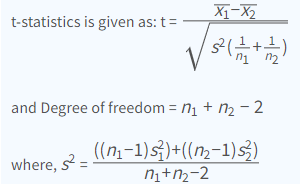

In [ ]:
#Code approach 1:
from scipy.stats import ttest_ind_from_stats
t_stat, p_value = ttest_ind_from_stats(2.87, 1.08, 150, 2.56, 1.28, 200, alternative="greater")
print("Test statistic = ", round(t_stat, 2))
print("P-value", round(p_value, 4))
if p_value < 0.01:
  print("Reject H0")
else:
  print("Fail to reject H0")

Test statistic =  2.39
P-value 0.0086
Reject H0


In [ ]:
# Code approach 2:
from scipy import stats
from scipy.stats import t
import numpy as np
n1=150
samp_avg1 = 2.87
samp_std1 = 1.08
n2=200
samp_avg2 = 2.56
samp_std2 = 1.28
df=n1 + n2 - 2
print('Degrees of freedom:', df)
s = np.sqrt((((n1-1)*(samp_std1**2)) + ((n2-1)*(samp_std2**2))) / (n1 + n2 - 2))
t_stat = (samp_avg1 - samp_avg2) / (s*np.sqrt(1/n1+ 1/n2))
print('Test Statistic:',round(abs( t_stat),2))
t_val = t.ppf(0.99, df=min(n1 - 1, n2 - 1))
print('Critical value for t-test:', round(t_val, 2))
if t_stat < t_val :
 print('t stat < t critical so, fail to reject the null hypothesis ')
else:
 print('t stat > t critical reject the null hypothesis ')


Degrees of freedom: 348
Test Statistic: 2.39
Critical value for t-test: 2.35
t stat > t critical reject the null hypothesis 


In case of two tail test, find t-crtitcal value with 95% confidence:
* critical_value = round(t.ppf(0.05/2, df=49), 4)

* H0: μ1 ≤ μ2, i.e., the average score of females is not greater than the average score of males.
* H1: μ1 > μ2 (Right-tailed test), the average score of females is greater than the average score of males.


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, kstest
female_scores=pd.Series([25,30,45,49,47,35,32,42])
male_scores=pd.Series([45,47,25,22,29,32,27,28,40,49,50,33])

t_stat, p_value = ttest_ind(female_scores, male_scores, alternative="two-sided")
print("Test statistic = ", round(t_stat,3))
if p_value < 0.05:
 print("Reject H0")
else: 
 print("Fail to reject H0")

Test statistic =  0.58
Fail to reject H0


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## ANOVA: Analysis of Variance

### iPhone Sales

In [ ]:
a = [25, 25, 27, 30, 23, 20]
b = [30, 30, 21, 24, 26, 28]
c = [18, 30, 29, 29, 24, 26]
list_of_tuples = list(zip(a, b,c))
df = pd.DataFrame(list_of_tuples, columns = ['A', 'B', 'C'])
df

,A,B,C
0,25,30,18
1,25,30,30
2,27,21,29
3,30,24,29
4,23,26,24
5,20,28,26


In [ ]:
m1 = np.mean(a)
m2 = np.mean(b)
m3 = np.mean(c)

print('Average sales for A: {}'.format(m1))
print('Average sales for B: {}'.format(m2))
print('Average sales for C: {}'.format(m3))

Average sales for A: 25.0
Average sales for B: 26.5
Average sales for C: 26.0


In [ ]:
m = (m1+m2+m3)/3 
print('Overall mean: {}'.format(m))

Overall mean: 25.833333333333332


In [ ]:
SSb = 6*((m1-m)**2+(m2-m)**2+(m3-m)**2)
print(f'Between-groups Sum of Squared Differences: {SSb}')

Between-groups Sum of Squared Differences: 6.999999999999999


In [ ]:
MSb = SSb/2
print('Between-groups Mean Square value: {}'.format(MSb))

Between-groups Mean Square value: 3.4999999999999996


In [ ]:
err_a = list(a-m1)
err_b = list(b-m2)
err_c = list(c-m3)
err = err_a+err_b+err_c
ssw = []
for i in err:
    ssw.append(i**2)
    
SSw = np.sum(ssw)
print(SSw)

223.5


In [ ]:
MSw = SSw/15
print(f'Within-group Mean Square Value: {MSw}')

Within-group Mean Square Value: 14.9


In [ ]:
F = MSb / MSw
print(f'F-score: {F}')

F-score: 0.23489932885906037


In [ ]:
d1 = 2
d2 = 15

from scipy.stats import f
p_value = 1 - f.cdf(F, d1, d2)
print(f'p-value: {p_value}')

p-value: 0.7935046627328333


In [ ]:
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(a, b, c)
print("F-stat: ", f_stat)
print("p-value: ", p_value)

F-stat:  0.2348993288590604
p-value:  0.793504662732833


### Aerofit data

Let us apply ANOVA to study the relationships between the following variables:
  1. Income vs. Product
  2. Income vs. Gender

In [ ]:
df_aerofit = pd.read_csv("aerofit.csv")

In [ ]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#### Income vs. Product

<AxesSubplot:xlabel='Product', ylabel='Income'>

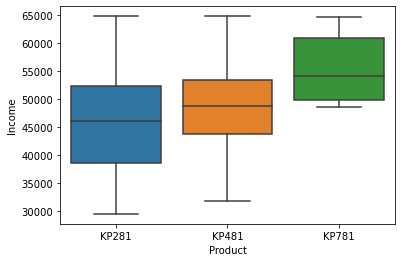

In [ ]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

In [ ]:
a = df_aerofit[df_aerofit["Product"]=="KP281"]["Income"]
b = df_aerofit[df_aerofit["Product"]=="KP481"]["Income"]
c = df_aerofit[df_aerofit["Product"]=="KP781"]["Income"]

In [ ]:
# H0: all three have same mean
f_oneway(a, b, c)

F_onewayResult(statistic=9.429558739603765, pvalue=0.0001393090413815614)

In [ ]:
f_oneway(a, b)

F_onewayResult(statistic=2.9858922233490746, pvalue=0.08629670116194317)

<AxesSubplot:xlabel='Income', ylabel='Count'>

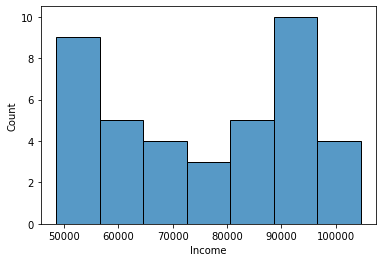

In [ ]:
sns.histplot(c)

In [ ]:
from scipy.stats import kruskal

In [ ]:
kruskal(a, b, c)

KruskalResult(statistic=61.43670384567185, pvalue=4.562357014275808e-14)

__Is education gender independent?__

A random sample of 395 people was surveyed and each person was asked to report the highest education level they obtained.

The data observed are summarized below:

Female(60, 54, 46, 41, 201), Male(40, 44, 53, 57, 194) and Total(100, 98, 99, 98, 395),

where variables in each class are (High school, Bachelors, Masters, Ph.d, Total).

The expected values are: Female(50.866, 49.868, 50.377, 49.868, 201), Male(49.114, 48.132, 48.623, 48.132, 194) and Total(100, 98, 99, 98, 395).

Are gender and education levels dependent at a 5% significance level?

In [ ]:
from scipy.stats import chi2_contingency

ct = [
    [60, 40],
    [54, 44],
    [46, 53],
    [41, 57]
]

chi2_contingency(ct)

(8.006066246262538,
 0.045886500891747214,
 3,
 array([[50.88607595, 49.11392405],
        [49.86835443, 48.13164557],
        [50.37721519, 48.62278481],
        [49.86835443, 48.13164557]]))

### Scaler Problem Solving Example
# * T-test when Sample are depedent

In [ ]:
df_ps = pd.read_csv("problem_solving.csv")
# test1 was before the session, test2 was after

In [ ]:
df_ps

,id,test_1,test_2
0,0,40,38
1,1,49,44
2,2,65,69
3,3,59,63
4,4,44,43
...,...,...,...
132,132,45,44
133,133,46,42
134,134,40,35
135,135,60,66


In [ ]:
df_ps.describe()

,id,test_1,test_2
count,137.000000,137.000000,137.000000
mean,68.000000,60.489051,62.430657
std,39.692569,17.080311,17.516293
min,0.000000,30.000000,27.000000
25%,34.000000,46.000000,48.000000
50%,68.000000,59.000000,62.000000
75%,102.000000,75.000000,77.000000
max,136.000000,89.000000,96.000000


In [ ]:
from scipy.stats import ttest_ind, ttest_rel
ttest_ind(df_ps["test_1"], df_ps["test_2"], alternative="less")

Ttest_indResult(statistic=-0.9288987997838147, pvalue=0.17688256437398803)

In [ ]:
#H0: m1 = m2
#H1: m1 < m2
ttest_rel(df_ps["test_1"], df_ps["test_2"], alternative="less")

Ttest_relResult(statistic=-5.502886353508166, pvalue=8.979201768961535e-08)

In [27]:
S = [ 300,400,300,500,0]
N = [600,300,300,400]
R =[700,300,400,600,500]

In [29]:
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(S, N, R)
print("F-stat: ", f_stat)
print("p-value: ", p_value)
if p_value<0.05:
  print("reject")

F-stat:  1.8333333333333335
p-value:  0.20551188781212737
